In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_2014 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2014_clean.csv', encoding='utf-8')
df_2016 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2016_clean.csv', encoding='utf-8')
df_2017 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2017_clean.csv', encoding='utf-8')
df_2018 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2018_clean.csv', encoding='utf-8')
df_2019 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2019_clean.csv', encoding='utf-8')

In [3]:
def split_tech_non(df):
    # Tech, Non-Tech
    return df.loc[df['9'] == 1].copy(), df.loc[df['9'] == 0].copy()

df_2014_t, df_2014_n = split_tech_non(df_2014)
df_2016_t, df_2016_n = split_tech_non(df_2016)
df_2017_t, df_2017_n = split_tech_non(df_2017)
df_2018_t, df_2018_n = split_tech_non(df_2018)
df_2019_t, df_2019_n = split_tech_non(df_2019)

In [4]:
company_size = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26-100': '26-100',
    '100-500': '100-500',
    '500-1000': '500-1000',
    'More than 1000': '1000+'
}

In [5]:
def pie_by_size(df, _id):
    subset = df.dropna(subset=['8', _id])
    values = []
    for k, v in company_size.items():
        values.append(subset.loc[subset['8'] == k][['1', _id]].groupby(_id).count().values.flatten())
        
    return values    

In [6]:
def pie_by_gender(df, _id):
    subset = df.dropna(subset=['2', _id])

    _m = subset.loc[subset['2'] == 'Male'].groupby(_id).count()['UserID'].values
    _f = subset.loc[subset['2'] == 'Female'].groupby(_id).count()['UserID'].values
    _q = subset[~subset['2'].str.contains('Male|Female')].groupby(_id).count()['UserID'].values
    
    return _m, _f, _q

## Question 64, 65

64 - Overall, how much importance does your employer place on physical health? (0-10)

65 - Overall, how much importance does your employer place on mental health? (0-10)

### Comparing Tech Companies to Non-Tech Companies

When comparing the perceived importance on mental and physical health between tech and non-tech companies, we can see that employees of both types of companies think that their employers put less emphasis on mental health than physical health. However, it looks like tech companies place more importance on mental health compared to non-tech companies. Over the 3 years,  both types of companies don't seem to show any significant improvement over time.

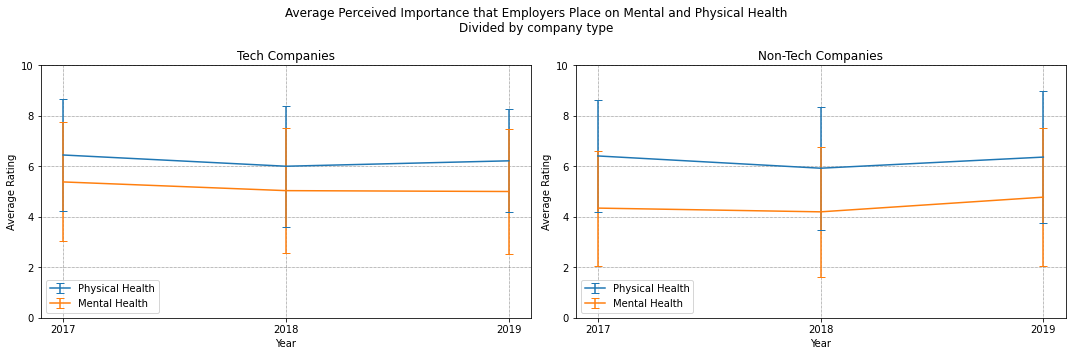

In [7]:
q6X_X = ['2017', '2018', '2019']

fig, (left, right) = plt.subplots(1, 2, figsize=(15,5))

left.errorbar(
    q6X_X,
    [df_2017_t['64'].mean(), df_2018_t['64'].mean(), df_2019_t['64'].mean()],
    [df_2017_t['64'].std(), df_2018_t['64'].std(), df_2019_t['64'].std()],
    capsize=4,
    label='Physical Health'
)
left.errorbar(
    q6X_X,
    [df_2017_t['65'].mean(), df_2018_t['65'].mean(), df_2019_t['65'].mean()],
    [df_2017_t['65'].std(), df_2018_t['65'].std(), df_2019_t['65'].std()],
    capsize=4,
    label='Mental Health'
)
left.set_xlabel('Year')
left.set_ylabel('Average Rating')
left.set_ylim(0, 10)
left.grid(which='major', linestyle=':', linewidth='0.5', color='black')
left.legend(loc='lower left')
left.set_title('Tech Companies')

right.errorbar(
    q6X_X,
    [df_2017_n['64'].mean(), df_2018_n['64'].mean(), df_2019_n['64'].mean()],
    [df_2017_n['64'].std(), df_2018_n['64'].std(), df_2019_n['64'].std()],
    capsize=4,
    label='Physical Health'
)
right.errorbar(
    q6X_X,
    [df_2017_n['65'].mean(), df_2018_n['65'].mean(), df_2019_n['65'].mean()],
    [df_2017_n['65'].std(), df_2018_n['65'].std(), df_2019_n['65'].std()],
    capsize=4,
    label='Mental Health'
)
right.set_xlabel('Year')
right.set_ylabel('Average Rating')
right.set_ylim(0, 10)
right.grid(which='major', linestyle=':', linewidth='0.5', color='black')
right.legend()
right.set_title('Non-Tech Companies')

plt.suptitle('Average Perceived Importance that Employers Place on Mental and Physical Health\nDivided by company type')
plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between company sizes

#### Consolidated

When looking at each size of company, we can see that the larger the company, the more importance physical health has. Regarding mental health, this doesn't seem to be the case, and the level of importance over the years seems seemingly random.

In [8]:
def q6X_means(dfs, years, _id):
    new_dfs = []
    for index, df in enumerate(dfs):
        temp = df[['8', _id]].groupby('8').mean().copy()
        new_dfs.append(temp.rename(columns={_id: years[index]}))
    return pd.concat(new_dfs, axis=1).transpose(copy=True)
    
def q6X_std(dfs, years, _id):
    new_dfs = []
    for index, df in enumerate(dfs):
        temp = df[['8', _id]].groupby('8').std().copy()
        new_dfs.append(temp.rename(columns={_id: years[index]}))
    return pd.concat(new_dfs, axis=1).transpose(copy=True)

def q6X_size(dfs, years, _id):
    _means = []
    _stds  = []
    for index, df in enumerate(dfs):
        m_temp = df[['8', _id]].groupby('8').mean().copy()
        _means.append(m_temp.rename(columns={_id: years[index]}))
        
        s_temp = df[['8', _id]].groupby('8').std().copy()
        _stds.append(s_temp.rename(columns={_id: years[index]}))
    return pd.concat(_means, axis=1).transpose(copy=True), pd.concat(_stds, axis=1).transpose(copy=True)

q6X_dfs = [df_2017_t, df_2018_t, df_2019_t]
q64_m_171819, q64_s_171819 = q6X_size(q6X_dfs, q6X_X, '64')
q65_m_171819, q65_s_171819 = q6X_size(q6X_dfs, q6X_X, '65')

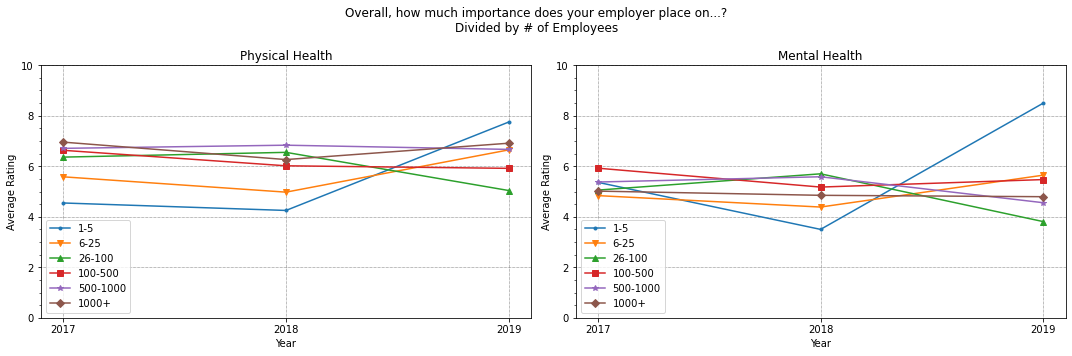

In [9]:
fig, (left, right) = plt.subplots(1, 2, figsize=(15,5))
q6X_markers = ['.', 'v', '^', 's', '*', 'D']

for i, (k, v) in enumerate(company_size.items()):
    left.plot(q6X_X, q64_m_171819[k], label=v, marker=q6X_markers[i])
left.set_xlabel('Year')
left.set_ylabel('Average Rating')
left.set_ylim(0, 10)
left.set_yticks(np.arange(0, 10, 0.5), minor=True)
left.grid(which='major', linestyle=':', linewidth='0.5', color='black')
left.legend()
left.set_title('Physical Health')

for i, (k, v) in enumerate(company_size.items()):
    right.plot(q6X_X, q65_m_171819[k], label=v, marker=q6X_markers[i])
right.set_xlabel('Year')
right.set_ylabel('Average Rating')
right.set_ylim(0, 10)
right.set_yticks(np.arange(0, 10, 0.5), minor=True)
right.grid(which='major', linestyle=':', linewidth='0.5', color='black')
right.legend(loc='lower left')
right.set_title('Mental Health')

plt.suptitle('Overall, how much importance does your employer place on...?\nDivided by # of Employees')
plt.tight_layout()
plt.show()

#### Breakdown

Looking at each company size in its' own separate graph, we can see that the gap between physical and mental health increases as company sizes increase. This behavior is consistent over all 3 years, except for the very small companies (size 1-5)

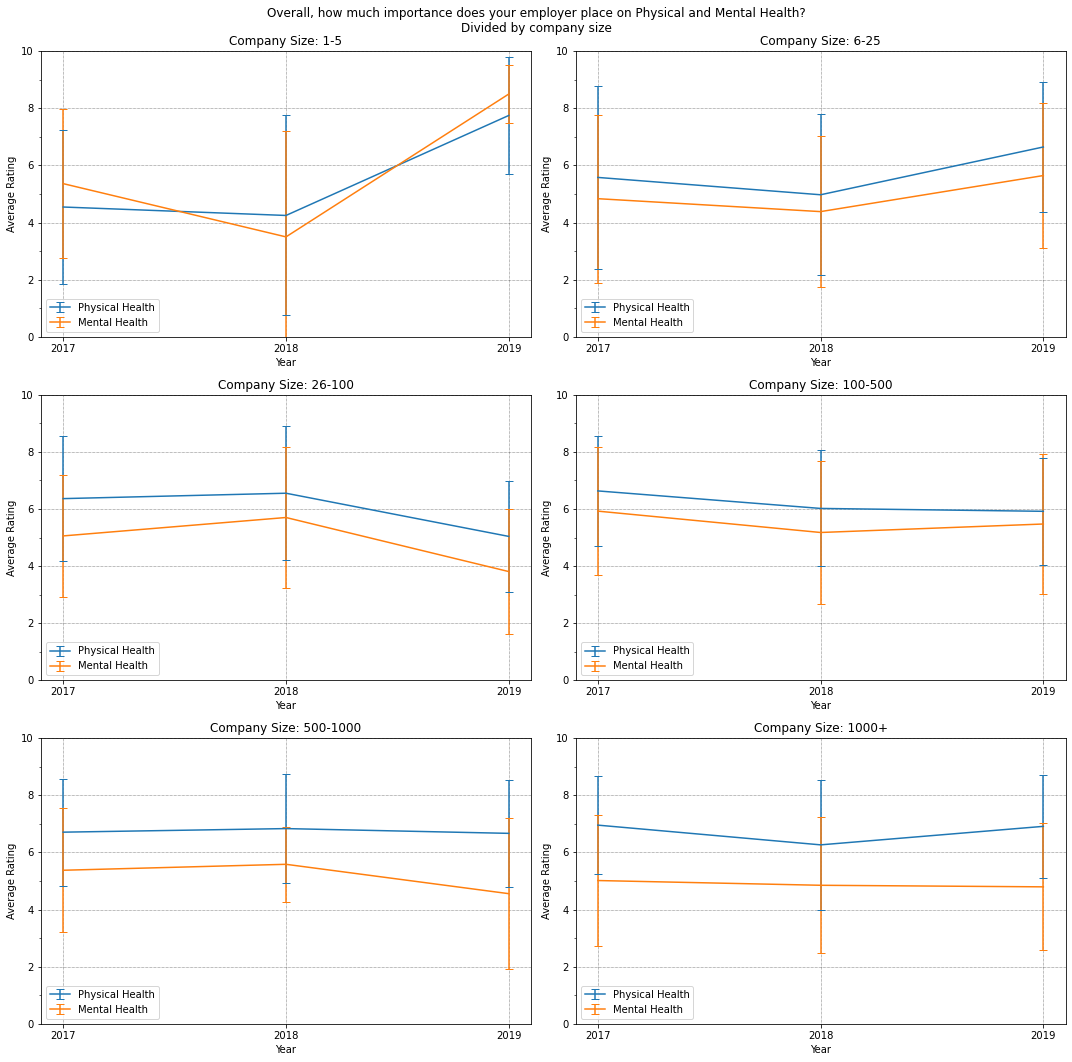

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2
    axs[_y, _x].errorbar(q6X_X, q64_m_171819[k], q64_s_171819[k], capsize=4, label='Physical Health')
    axs[_y, _x].errorbar(q6X_X, q65_m_171819[k], q65_s_171819[k], capsize=4, label='Mental Health')
    axs[_y, _x].set_xlabel('Year')
    axs[_y, _x].set_ylabel('Average Rating')
    axs[_y, _x].set_ylim(0, 10)
    axs[_y, _x].set_yticks(np.arange(0, 10, 1), minor=True)
    axs[_y, _x].grid(which='major', linestyle=':', linewidth='0.5', color='black')
    axs[_y, _x].legend(loc='lower left')
    axs[_y, _x].set_title('Company Size: ' + v)
    
plt.suptitle('Overall, how much importance does your employer place on Physical and Mental Health?\nDivided by company size')
plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between genders

Dividing this group by gender, we can see that the gap between perceived company importance on physical health and mental health still exists. However, according to males, it looks like they seem to perceive that the companies they work for place less importance on both types of health compared to the other genders.

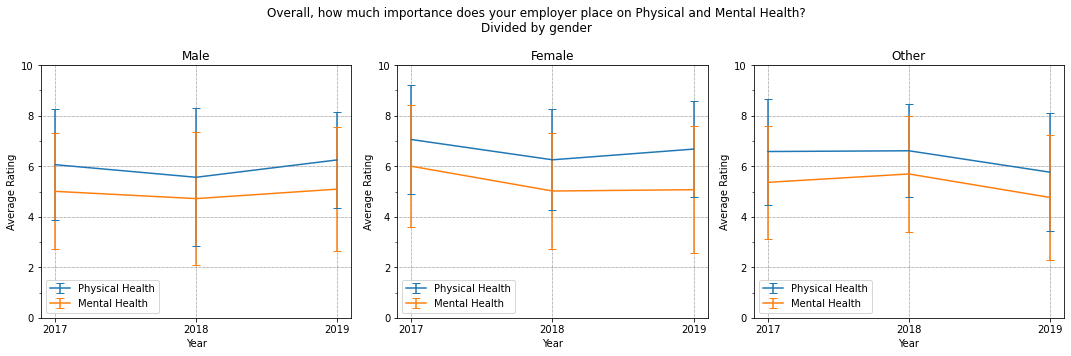

In [11]:
def q6X_gender(dfs, years, _id):
    mean = {
        'Male': [],
        'Female': [],
        'Other': []
    }
    std = {
        'Male': [],
        'Female': [],
        'Other': []
    }
    for index, df in enumerate(dfs):
        subset = df.dropna(subset=['2', _id])
        
        mean['Male'].append(subset.loc[subset['2'] == 'Male'][_id].mean())
        mean['Female'].append(subset.loc[subset['2'] == 'Female'][_id].mean())
        mean['Other'].append(subset[~subset['2'].str.contains('Male|Female')][_id].mean())
        
        std['Male'].append(subset.loc[subset['2'] == 'Male'][_id].std())
        std['Female'].append(subset.loc[subset['2'] == 'Female'][_id].std())
        std['Other'].append(subset[~subset['2'].str.contains('Male|Female')][_id].std())
        
    return mean, std

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

q6X_g_64_means, q6X_g_64_stds = q6X_gender(q6X_dfs, q6X_X, '64')
q6X_g_65_means, q6X_g_65_stds = q6X_gender(q6X_dfs, q6X_X, '65')

for idx, gender in enumerate(['Male', 'Female', 'Other']):
    axs[idx].errorbar(q6X_X, q6X_g_64_means[gender], q6X_g_64_stds[gender], capsize=4, label='Physical Health')
    axs[idx].errorbar(q6X_X, q6X_g_65_means[gender], q6X_g_65_stds[gender], capsize=4, label='Mental Health')
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel('Average Rating')
    axs[idx].set_ylim(0, 10)
    axs[idx].set_yticks(np.arange(0, 10, 1), minor=True)
    axs[idx].grid(which='major', linestyle=':', linewidth='0.5', color='black')
    axs[idx].legend(loc='lower left')
    axs[idx].set_title(gender)

plt.suptitle('Overall, how much importance does your employer place on Physical and Mental Health?\nDivided by gender')
plt.tight_layout()
plt.show()

## Question 91

91 - Do you feel that your employer takes mental health as seriously as physical health?

### Comparing Tech Companies to Non-Tech Companies

In 2014, there was a big difference in Yes and No, meaning at that time, the employees of non-tech companies felt that their employer did not take mental health as seriously as physical health. This improved in 2016, where the percentage of "Yes" rose to 29%. For tech companies, the change from 2014 to 2016 looks to be the shrinkage of people who answered "I don't know", meaning that the "Yes" and "No" answers were more frequent answers. Looking at the changes in percent, both the "Yes" and "No" answers increased by 5-6% from 2014. This number is inconclusive as to whether tech companies actually improved on whether they take mental health as seriously as physical health.

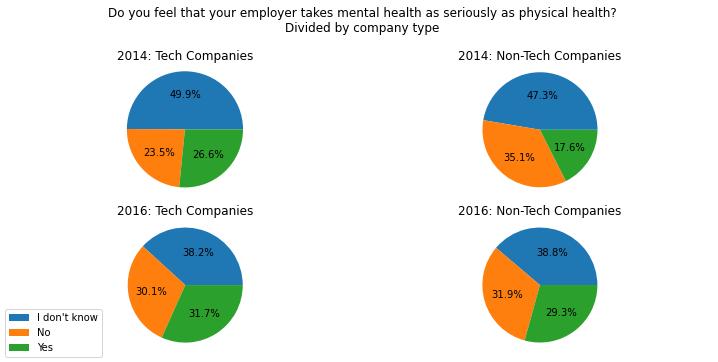

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))

axs[0, 0].pie(df_2014_t[['UserID', '91']].groupby('91').count()['UserID'].values, autopct='%1.1f%%')
axs[0, 0].axis('equal')
axs[0, 0].set_title('2014: Tech Companies')

axs[0, 1].pie(df_2014_n[['UserID', '91']].groupby('91').count()['UserID'].values, autopct='%1.1f%%')
axs[0, 1].axis('equal')
axs[0, 1].set_title('2014: Non-Tech Companies')

axs[1, 0].pie(df_2016_t[['UserID', '91']].groupby('91').count()['UserID'].values, autopct='%1.1f%%')
axs[1, 0].axis('equal')
axs[1, 0].set_title('2016: Tech Companies')

axs[1, 1].pie(df_2016_n[['UserID', '91']].groupby('91').count()['UserID'].values, autopct='%1.1f%%')
axs[1, 1].axis('equal')
axs[1, 1].set_title('2016: Non-Tech Companies')

plt.figlegend(labels=['I don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?\nDivided by company type')
plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between company sizes

For company size 1-5, the number of "No" decreased, while "Yes" increased by the same amount, meaning that there was a great improvment over those 2 years. For company sizes 6-25, 26-100, and 100-500, both "Yes" and "No" responses increased by a similar amount, meaning that there probably wasn't a huge change in the employer taking mental health as seriously as physical health. However, for company sizes 500-1000 and 1000+, the amount of "No" responses increased dramatically, and in the case of 1000+, the number of "Yes" responses decreased. This indicates that these larger companies are taking mental health less serious than physical health.

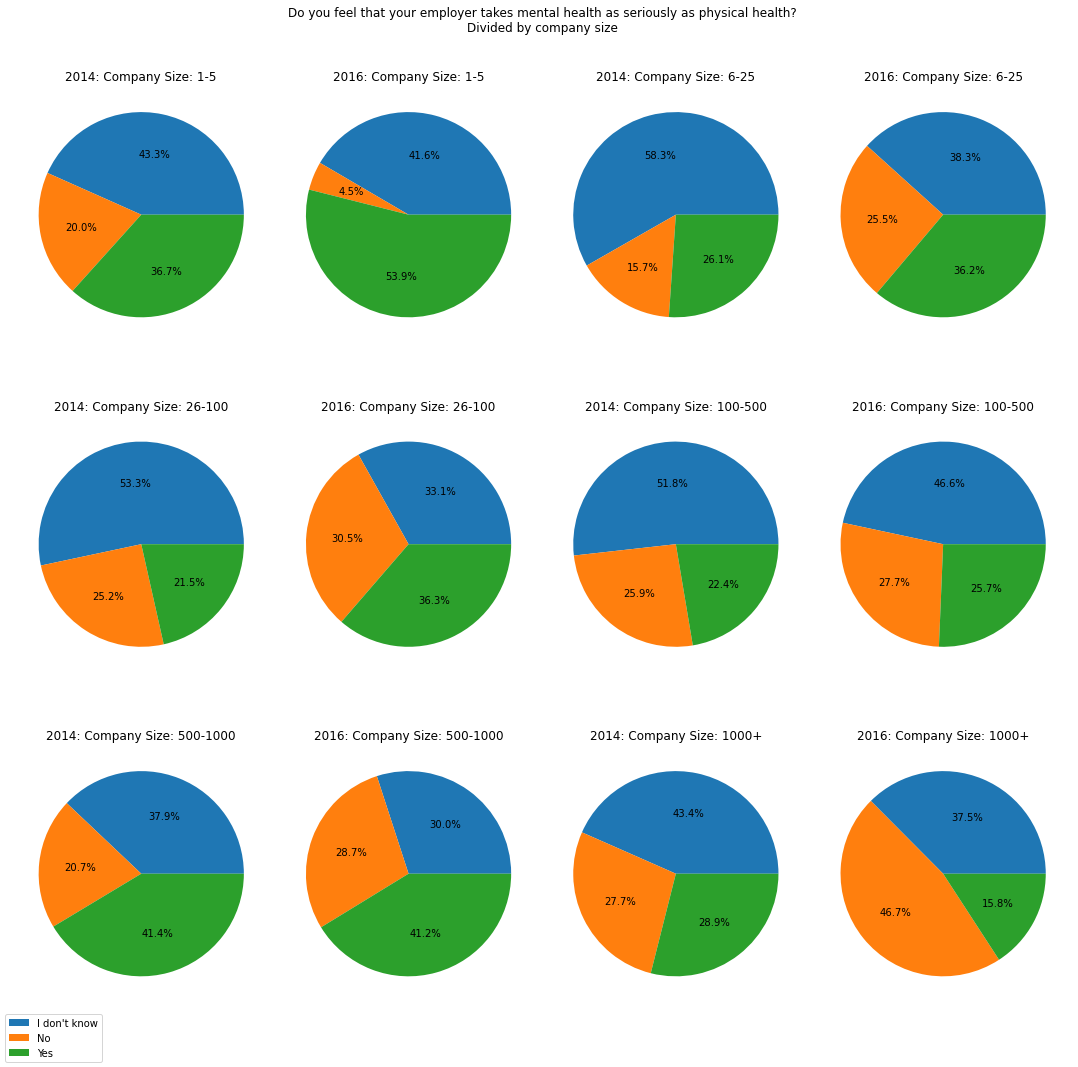

In [13]:
q91_14 = pie_by_size(df_2014_t, '91')
q91_16 = pie_by_size(df_2016_t, '91')

fig, axs = plt.subplots(3, 4, figsize=(15, 15))

for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2 * 2
    axs[_y, _x].pie(q91_14[index], autopct='%1.1f%%')
    axs[_y, _x].set_title('2014: Company Size: ' + v)
    axs[_y, _x + 1].pie(q91_16[index], autopct='%1.1f%%')
    axs[_y, _x + 1].set_title('2016: Company Size: ' + v)
    
plt.figlegend(labels=['I don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?\nDivided by company size')
plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between genders

When dividing by gender, both male and female employee's reported "Yes" and "No" increased proportionally over the years. However, for other genders, the amount of "No" responses increased dramatically while "Yes" decreased dramatically from 2014 to 2016. This shows a very negative change in those how employees that are not male or female see their employer taking mental health.

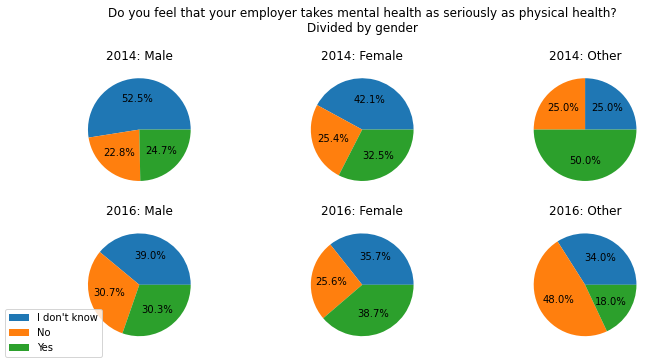

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))

q91_14_m, q91_14_f, q91_14_q = pie_by_gender(df_2014_t, '91')
axs[0, 0].pie(q91_14_m, autopct='%1.1f%%')
axs[0, 0].set_title('2014: Male')
axs[0, 1].pie(q91_14_f, autopct='%1.1f%%')
axs[0, 1].set_title('2014: Female')
axs[0, 2].pie(q91_14_q, autopct='%1.1f%%')
axs[0, 2].set_title('2014: Other')

q91_16_m, q91_16_f, q91_16_q = pie_by_gender(df_2016_t, '91')
axs[1, 0].pie(q91_16_m, autopct='%1.1f%%')
axs[1, 0].set_title('2016: Male')
axs[1, 1].pie(q91_16_f, autopct='%1.1f%%')
axs[1, 1].set_title('2016: Female')
axs[1, 2].pie(q91_16_q, autopct='%1.1f%%')
axs[1, 2].set_title('2016: Other')

plt.figlegend(labels=['I don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?\nDivided by gender')
plt.tight_layout()
plt.show()

## Question 104

104 - Do you think that discussing a mental health disorder with your employer would have negative consequences?

### Comparing Tech Companies to Non-Tech Companies

Tech companies, compared to non-tech, have a greater amount of "No" answers and a much less amount of "Yes" answers, meaning that in general, employees of tech companies are less comfortable compared to their peers who work at non-tech companies.

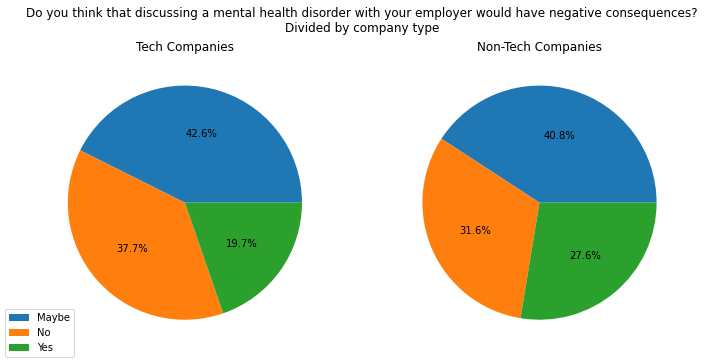

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].pie(df_2016_t[['UserID', '104']].groupby('104').count()['UserID'].values, autopct='%1.1f%%')
axs[0].set_title('Tech Companies')
axs[1].pie(df_2016_n[['UserID', '104']].groupby('104').count()['UserID'].values, autopct='%1.1f%%')
axs[1].set_title('Non-Tech Companies')

plt.figlegend(labels=['Maybe', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you think that discussing a mental health disorder with your employer would have negative consequences?\nDivided by company type')
plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between company sizes

Most companies look to have generally low percentage of employees who say "Yes", except for companies that have 1000+ employees, where 36% of them say "Yes." This shows that the very large employer would probably punish or don't care of the workers who do have mental health disorders.

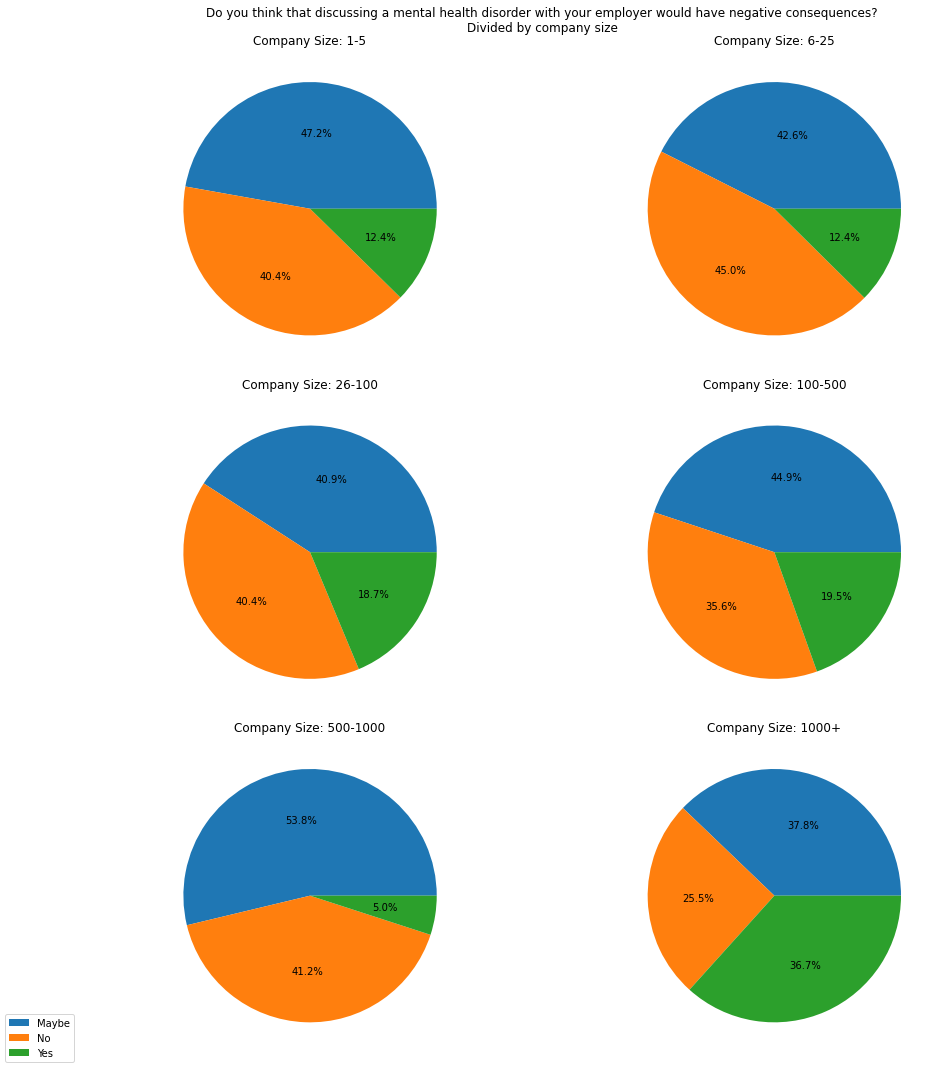

In [16]:
q104_16 = pie_by_size(df_2016_t, '104')

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2
    axs[_y, _x].pie(q104_16[index], autopct='%1.1f%%')
    axs[_y, _x].set_title('Company Size: ' + v)
    
plt.figlegend(labels=['Maybe', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you think that discussing a mental health disorder with your employer would have negative consequences?\nDivided by company size')
plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between genders

Compared to male and female employees, employees who do not idenfity with either gender see that discussing their mental health disorder would result in negative consquences, which means that their employers are probably not that supportive of their issues.

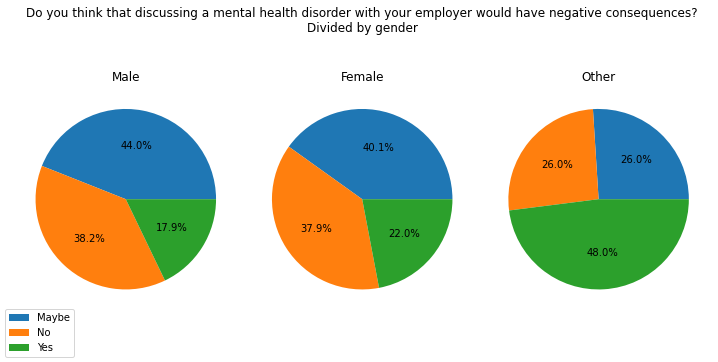

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))

q104_16_m, q104_16_f, q104_16_q = pie_by_gender(df_2016_t, '104')
axs[0].pie(q104_16_m, autopct='%1.1f%%')
axs[0].set_title('Male')
axs[1].pie(q104_16_f, autopct='%1.1f%%')
axs[1].set_title('Female')
axs[2].pie(q104_16_q, autopct='%1.1f%%')
axs[2].set_title('Other')

plt.figlegend(labels=['Maybe', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you think that discussing a mental health disorder with your employer would have negative consequences?\nDivided by gender')
plt.tight_layout()
plt.show()